In [105]:
import os
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [106]:
train_data = pd.read_csv(r'C:\Users\tejar\OneDrive\Desktop\Competitions\Bike Sharing\train.csv')
test_data = pd.read_csv(r'C:\Users\tejar\OneDrive\Desktop\Competitions\Bike Sharing\test.csv')

In [107]:
train_data.shape, train_data.size

((10886, 12), 130632)

In [108]:
test_data.shape, test_data.size

((6493, 9), 58437)

In [109]:
train_data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [110]:
test_data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [111]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [112]:
train_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [113]:
test_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [114]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [115]:
train_data = train_data.drop(['casual', 'registered'], axis = 1)

In [116]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [117]:
train_data['datetime'] = pd.to_datetime(train_data['datetime'])
test_data['datetime'] = pd.to_datetime(test_data['datetime'])

In [118]:
train_data['hour'] = train_data['datetime'].dt.hour
test_data['hour'] = test_data['datetime'].dt.hour

In [119]:
date = test_data['datetime'].dt.date
hour = test_data['datetime'].dt.hour

In [120]:
train_data['month'] = train_data['datetime'].dt.month
test_data['month'] = test_data['datetime'].dt.month

In [121]:
train_data['year'] = train_data['datetime'].dt.year
test_data['year'] = test_data['datetime'].dt.year

In [122]:
train_data['day'] = train_data['datetime'].dt.day
test_data['day'] = test_data['datetime'].dt.day

In [123]:
train_data['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [124]:
test_data['year'].value_counts()

2012    3270
2011    3223
Name: year, dtype: int64

In [125]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,month,year,day
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,1,2011,20
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,1,2011,20
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,1,2011,20
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,1,2011,20
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,1,2011,20


In [126]:
train_data.groupby(['month'])['count'].sum()

month
1      79884
2      99113
3     133501
4     167402
5     200147
6     220733
7     214617
8     213516
9     212529
10    207434
11    176440
12    160160
Name: count, dtype: int64

In [127]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month,year,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,1,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,1,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,1,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,1,2011,1


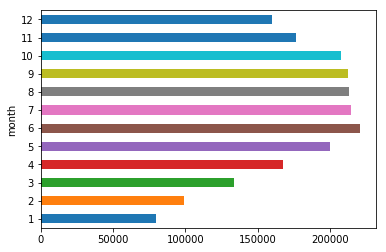

In [128]:
train_data.groupby(['month'])['count'].sum().plot.barh()

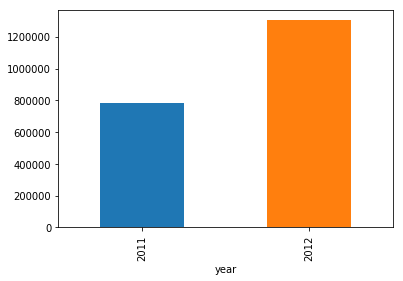

In [129]:
train_data.groupby(['year'])['count'].sum().plot.bar()


In [130]:
train_data.groupby(['weather'])['count'].sum()

weather
1    1476063
2     507160
3     102089
4        164
Name: count, dtype: int64

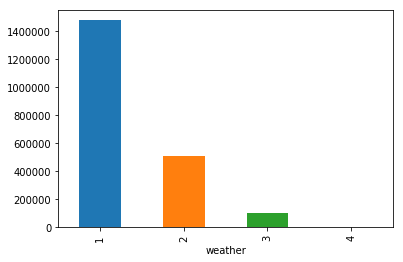

In [131]:
train_data.groupby(['weather'])['count'].sum().plot.bar()

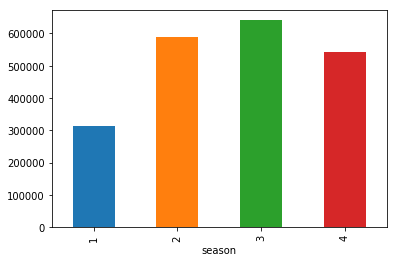

In [132]:
train_data.groupby(['season'])['count'].sum().plot.bar()

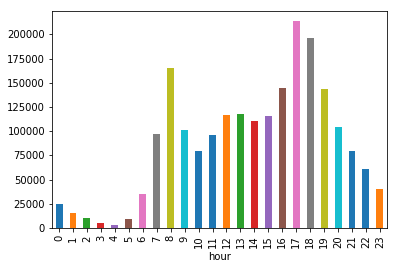

In [133]:
train_data.groupby(['hour'])['count'].sum().plot.bar()

C:\Users\tejar\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


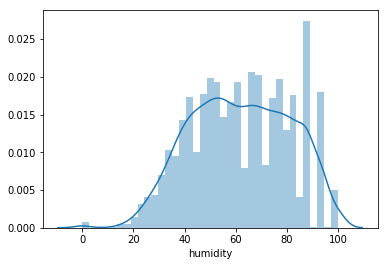

In [134]:
sns.distplot(train_data['humidity'])

C:\Users\tejar\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


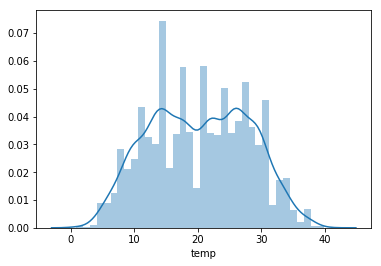

In [135]:
sns.distplot(train_data['temp'])

C:\Users\tejar\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


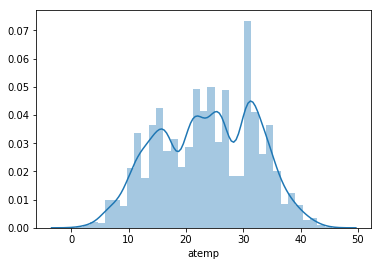

In [136]:
sns.distplot(train_data['atemp'])

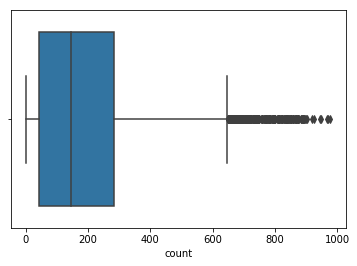

In [137]:
sns.boxplot(x=train_data['count'])

In [138]:
corr_matrix = train_data.corr()

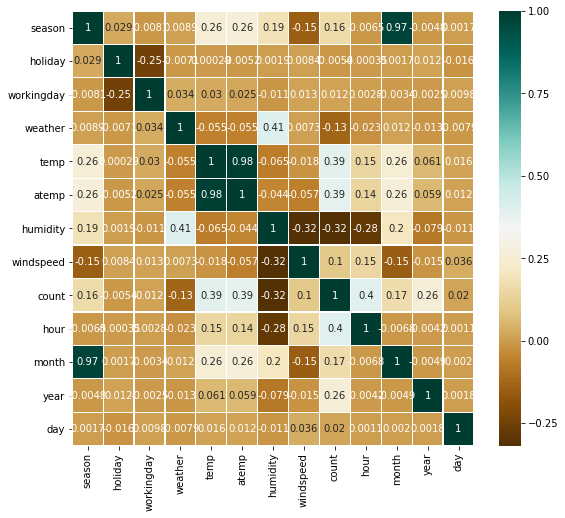

In [139]:
plt.figure(figsize=(9,8))
sns.heatmap(data=corr_matrix,cmap='BrBG',annot=True,linewidths=0.2)

In [140]:
q1 = np.percentile(train_data['count'],25)
q3 = np.percentile(train_data['count'],75)
iqr = q3-q1
ub = q3+1.5*iqr
ub

647.0

In [141]:
(train_data['count'] > ub).value_counts()

False    10586
True       300
Name: count, dtype: int64

In [142]:
for i in range(0,len(train_data)):
    if train_data['count'][i] > ub:
        train_data['count'][i] = ub
        

C:\Users\tejar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [143]:
train_data = train_data.drop(['datetime'], axis = 1)

In [144]:
train_data = pd.get_dummies(train_data,columns=['season'])
test_data = pd.get_dummies(test_data,columns=['season'])

In [145]:
train_data = pd.get_dummies(train_data,columns=['weather'])
test_data = pd.get_dummies(test_data,columns=['weather'])

In [146]:
train_data = pd.get_dummies(train_data,columns=['year'])
test_data = pd.get_dummies(test_data,columns=['year'])

In [147]:
x_train = train_data.drop(['count','month','day'], axis =1)
y_train = train_data['count']
x_test = test_data.drop(['datetime','month','day'], axis = 1)

In [148]:
x_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,hour,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year_2011,year_2012
0,0,0,9.84,14.395,81,0.0,0,1,0,0,0,1,0,0,0,1,0
1,0,0,9.02,13.635,80,0.0,1,1,0,0,0,1,0,0,0,1,0
2,0,0,9.02,13.635,80,0.0,2,1,0,0,0,1,0,0,0,1,0
3,0,0,9.84,14.395,75,0.0,3,1,0,0,0,1,0,0,0,1,0
4,0,0,9.84,14.395,75,0.0,4,1,0,0,0,1,0,0,0,1,0


In [149]:
x_test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,hour,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,year_2011,year_2012
0,0,1,10.66,11.365,56,26.0027,0,1,0,0,0,1,0,0,0,1,0
1,0,1,10.66,13.635,56,0.0000,1,1,0,0,0,1,0,0,0,1,0
2,0,1,10.66,13.635,56,0.0000,2,1,0,0,0,1,0,0,0,1,0
3,0,1,10.66,12.880,56,11.0014,3,1,0,0,0,1,0,0,0,1,0
4,0,1,10.66,12.880,56,11.0014,4,1,0,0,0,1,0,0,0,1,0


### Linear Regression

In [150]:
lr = LinearRegression()
model_fit = lr.fit(x_train, y_train)

In [151]:
test_pred = model_fit.predict(x_test)
test_data['count'] = test_pred

In [152]:
test_data[['count','datetime']].to_csv('sampleSubmission.csv', index=True)

In [153]:
import os
os.getcwd()

'C:\\Users\\tejar\\OneDrive\\Desktop\\Python Files'

### Random Forest Regressor

In [154]:
from sklearn.ensemble import RandomForestRegressor

In [155]:
rfr = RandomForestRegressor()

In [156]:
 model1 = rfr.fit(x_train, y_train)

In [157]:
test_pred = model1.predict(x_test)
test_data['count'] = test_pred

In [158]:
test_pred

array([  7.7,   6.1,   2.7, ..., 106.5,  94.6,  49.6])

In [159]:
test_data[['count','datetime']].to_csv('sampleSubmission.csv', index=True)

## Randomizedsearchcv

In [160]:
from sklearn.model_selection import RandomizedSearchCV

In [161]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
rf_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,
        'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}
rf =RandomForestRegressor()
best_rf_tree=RandomizedSearchCV(estimator=rf,param_distributions=rf_grid,n_jobs=-1,cv=3,scoring='neg_mean_squared_log_error')

In [162]:
 model3 = best_rf_tree.fit(x_train,y_train)

In [163]:
test_pred = model3.predict(x_test)
test_data['count'] = test_pred

In [164]:
test_data[['count','datetime']].to_csv('sampleSubmission.csv', index=True)